<a href="https://colab.research.google.com/github/Kanyz/Practica_III/blob/main/TALLER_PARA_PARCIAL_N%C2%B03_Primera_Parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ANÁLISIS ESTADÍSTICO DE NACIMIENTOS EN COLOMBIA 2023

Este estudio tiene como objetivo analizar estadísticamente dos variables fundamentales relacionadas con los nacimientos en Colombia para el año 2023:
**Tiempo de gestación (T_GES)**: Número de semanas de gestación del nacido vivo
**Talla de nacimiento (TALLA_NAC)**: Estatura del recién nacido en centímetros

El análisis se centrará en:
1. Caracterizar individualmente el comportamiento de cada variable
2. Explorar la posible relación o asociación entre ambas variables
3. Aplicar técnicas estadísticas descriptivas e inferenciales para validar dicha relación

El estudio del tiempo de gestación y la talla al nacer es crucial porque:
- Son **indicadores clave de salud perinatal** y desarrollo fetal
- Permiten identificar posibles **riesgos en el desarrollo infantil**
- Ayudan a comprender **patrones de crecimiento intrauterino** en la población colombiana

### ¿Con qué datos se trabajará?
Se utilizará la base de datos oficial **"BD-EEVV-Nacimientos-2023.csv"** proveniente del **DANE (Departamento Administrativo Nacional de Estadística)**, específicamente del catálogo 732 sobre Estadísticas Vitales - Nacimientos.

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

#Comportamiento de la Variable Tiempo de gestación (T_GES)
$X :=$ "Tiempo de gestación en semanas de un recién nacido en Colombia"



---



# Estadística descriptiva para variables cuantitativas



*   Gráficos para datos univariados cualitativos.
*   Proporciones asociadas a los valores de una variable cualitativa.



In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()


Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


Representacion gráfica del archivo subido.

In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",",index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


Tabla de las variable a analizar.

In [ ]:
tabla1 = tabla[['T_GES', 'EDAD_MADRE', 'TIPO_PARTO']]
tabla1.head(4)

,T_GES,EDAD_MADRE,TIPO_PARTO
COD_DPTO,,,
23,4,5,2
11,4,6,3
11,4,5,2
11,4,5,2


Eliminamos datos que no aportan información para hacer nuestro estudio.
Como por ejemplo no tener en cuenta los datos que son igual a 9, puesto que son categorizados sin información.

In [ ]:
df2 = tabla1[(tabla1 ["T_GES"] !=9) & (tabla1 ["EDAD_MADRE"] <99) & (tabla1 ["TIPO_PARTO"] !=9)]
df2.head(4)

,T_GES,EDAD_MADRE,TIPO_PARTO
COD_DPTO,,,
23,4,5,2
11,4,6,3
11,4,5,2
11,4,5,2


Tabla de la variable que principalmente estudiamos (vista como numero).

In [ ]:
df2.T_GES.head(2)

,T_GES
COD_DPTO,
23,4
11,4


Tabla de la variable que principalmente estudiamos (vista como objeto, puesto que queremos realizar un análisis cualitativo).

In [ ]:
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

/tmp/ipython-input-1862380299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


,T_GES
COD_DPTO,
23,4
11,4


Traducir la variable, pasar de su valor a la categoria.

In [ ]:
df2.loc [(df2.T_GES == "1"), "T_GES"] = "Menos de 22"
df2.loc [(df2.T_GES == "2"), "T_GES"] = "22 a 27"
df2.loc [(df2.T_GES == "3"), "T_GES"] = "28 a 37"
df2.loc [(df2.T_GES == "4"), "T_GES"] = "38 a 41"
df2.loc [(df2.T_GES == "5"), "T_GES"] = "42 y más"
df2.loc [(df2.T_GES == "6"), "T_GES"] = "Ignorado"
df2.loc [(df2.T_GES == "9"), "T_GES"] = "S.I"
df2.head(5)

,T_GES,EDAD_MADRE,TIPO_PARTO
COD_DPTO,,,
23,38 a 41,5,2
11,38 a 41,6,3
11,38 a 41,5,2
11,38 a 41,5,2
11,38 a 41,5,2


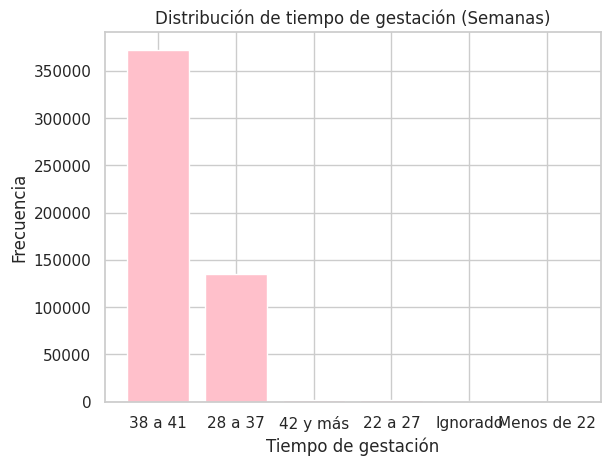

In [ ]:
#Diagrma de barras
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title("Distribución de tiempo de gestación (Semanas)")
plt.xlabel("Tiempo de gestación")
plt.ylabel("Frecuencia")
plt.show()

El valor 4 es el lapso de tiempo donde se tiene alrededor de 372000 casos de tiempo de gestación de un nacido vivo en Colombia (De 38 a 41 semanas) Este comportamiento se observa de manera consistente en la mayoría de los grupos de edad materna, especialmente entre las madres de 20 a 34 años, quienes concentran la mayor proporción de nacimientos: 26.8% en el grupo de 20-24 años, 25.7% en 25-29 años y 18.8% en 30-34 años.Se observa que en la mayoría de los grupos de edad materna, especialmente entre las madres de 20 a 34 años, quienes concentran la mayor proporción de nacimientos: 26.8% en el grupo de 20-24 años, 25.7% en 25-29 años y 18.8% en 30-34 años. Estos grupos, además de ser los de mayor fecundidad, suelen asociarse también con embarazos de evolución más regular, lo cual explica su alineación con las edades gestacionales óptimas.

En el valor 3 se tiene 134646 casos de gestación de un nacido vivo en Colombia (De 28 a 37 semanas) podrían estar influenciados por extremos de la edad de la madre, ya que los grupos de madres adolescentes (15-19 años) y madres mayores (35 años o más) suelen presentar mayor riesgo de complicaciones. Aunque los datos no cruzan directamente ambas variables, la distribución sugiere que la edad materna desempeña un papel importante en el resultado gestacional, siendo las edades intermedias las que muestran mayor prevalencia de gestaciones a término y, por tanto, mejores desenlaces en la duración del embarazo.. Los valores 5, 2, 6, 1 tienen menos de 50000 casos de tiempo de gestación de un nacido en Colombia.

In [ ]:
sizes = np.array(y_values)
sizes

array([372000, 134646,   1959,   1852,    483,     19])

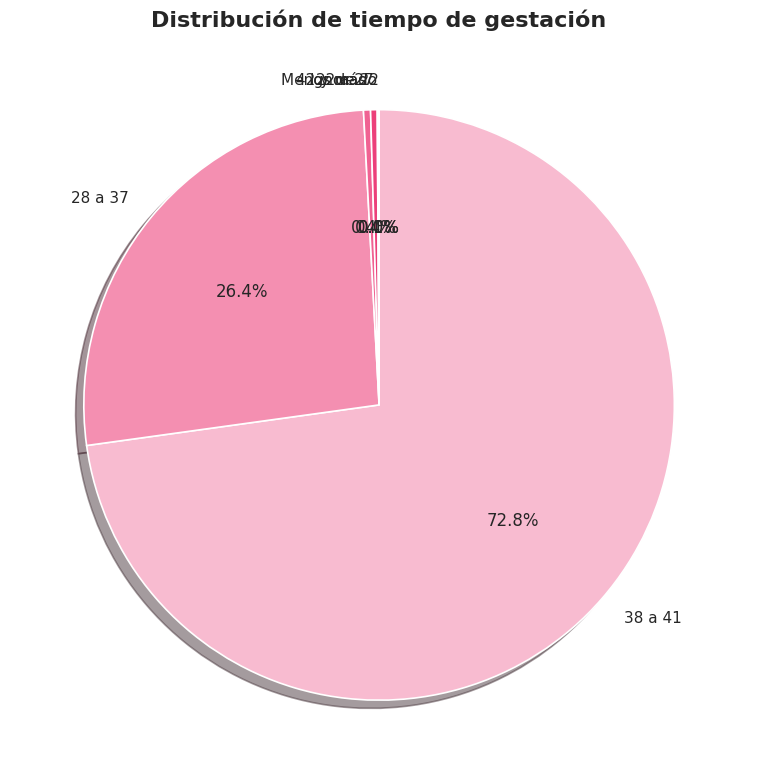

In [ ]:
colors = [
    "#F8BBD0",  # rosa claro pastel
    "#F48FB1",  # rosa medio suave
    "#F06292",  # rosa vivo
    "#EC407A",  # rosa intenso
    "#D81B60",  # rosa fuerte/frambuesa
    "#AD1457",  # rosa oscuro elegante
    "#880E4F"   # rosa vino profundo
]


plt.figure(figsize=(8,8))

plt.pie(
    y_values,
    labels=x_values,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    colors=colors[:len(y_values)],
    wedgeprops={"edgecolor": "white", "linewidth": 1.2},
    shadow=True
)

plt.title("Distribución de tiempo de gestación", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


In [ ]:
len(df2.T_GES)

510959

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38 a 41' '28 a 37' '42 y más' '22 a 27' 'Ignorado' 'Menos de 22']
[72.80427588123509, 26.351625081464462, 0.3833967108906977, 0.36245569605389083, 0.09452813239418427, 0.0037184979616759857]


Aproximadamente el 72.804% de periodos de gestación de recién nacidos en Colombia se dan durante 38 a 41 semanas, entre 28 a 37 semanas el 26.351%, entre 42 semanas o más el 0.383% entre 22 a 27 semanas el 0.362% y entre 22 a 27 semanas el 0.094%.

# Tablas de contingencia


*   Representación gráfica de una tabla de contigencia.
*   Proporciones asociadas a una tabla de contingencia.



In [ ]:
df2.loc [(df2.T_GES == "1"), "T_GES"] = "Menos de 22"
df2.loc [(df2.T_GES == "2"), "T_GES"] = "22 a 27"
df2.loc [(df2.T_GES == "3"), "T_GES"] = "28 a 37"
df2.loc [(df2.T_GES == "4"), "T_GES"] = "38 a 41"
df2.loc [(df2.T_GES == "5"), "T_GES"] = "42 y más"
df2.loc [(df2.T_GES == "6"), "T_GES"] = "Ignorado"
df2.loc [(df2.T_GES == "9"), "T_GES"] = "S.I"

df2.T_GES, df2.EDAD_MADRE = df2.T_GES.astype(str), df2.EDAD_MADRE.astype(str)
df2.head(5)

/tmp/ipython-input-140363813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.EDAD_MADRE = df2.T_GES.astype(str), df2.EDAD_MADRE.astype(str)


,T_GES,EDAD_MADRE,TIPO_PARTO
COD_DPTO,,,
23,38 a 41,5,2
11,38 a 41,6,3
11,38 a 41,5,2
11,38 a 41,5,2
11,38 a 41,5,2


In [ ]:
df2.loc [(df2.EDAD_MADRE == "1"), "EDAD_MADRE"] = "De 10 a 14 años"
df2.loc [(df2.EDAD_MADRE == "2"), "EDAD_MADRE"] = "De 15 a 19 años"
df2.loc [(df2.EDAD_MADRE == "3"), "EDAD_MADRE"] = "De 20 a 24 años"
df2.loc [(df2.EDAD_MADRE == "4"), "EDAD_MADRE"] = "De 25-29 Años"
df2.loc [(df2.EDAD_MADRE == "5"), "EDAD_MADRE"] = "De 30-34 Años"
df2.loc [(df2.EDAD_MADRE == "6"), "EDAD_MADRE"] = "De 35-39 Años"
df2.loc [(df2.EDAD_MADRE == "7"), "EDAD_MADRE"] = "De 40-44 Años"
df2.loc [(df2.EDAD_MADRE == "8"), "EDAD_MADRE"] = "De 45-49 Años"
df2.loc [(df2.EDAD_MADRE == "9"), "EDAD_MADRE"] = "De 50-54 Años"
df2.head()

,T_GES,EDAD_MADRE,TIPO_PARTO
COD_DPTO,,,
23,38 a 41,De 30-34 Años,2
11,38 a 41,De 35-39 Años,3
11,38 a 41,De 30-34 Años,2
11,38 a 41,De 30-34 Años,2
11,38 a 41,De 30-34 Años,2


Corresponde a la tabla con el eje X y Y vistas en su categoria ( X es la edad de la madre y Y  es el tiempo de gestación)

In [ ]:
tabla_contingencia = pd.crosstab(df2.T_GES, df2.EDAD_MADRE)
display(tabla_contingencia)

EDAD_MADRE,De 10 a 14 años,De 15 a 19 años,De 20 a 24 años,De 25-29 Años,De 30-34 Años,De 35-39 Años,De 40-44 Años,De 45-49 Años,De 50-54 Años
T_GES,,,,,,,,,
22 a 27,19,308,496,456,380,224,72,4,0
28 a 37,1285,20537,34512,33502,25685,14395,4388,333,9
38 a 41,2470,56693,101567,97321,69673,34872,8874,509,21
42 y más,7,83,132,94,93,51,22,1,0
Ignorado,43,415,501,350,239,185,92,23,4
Menos de 22,0,6,6,6,0,1,0,0,0


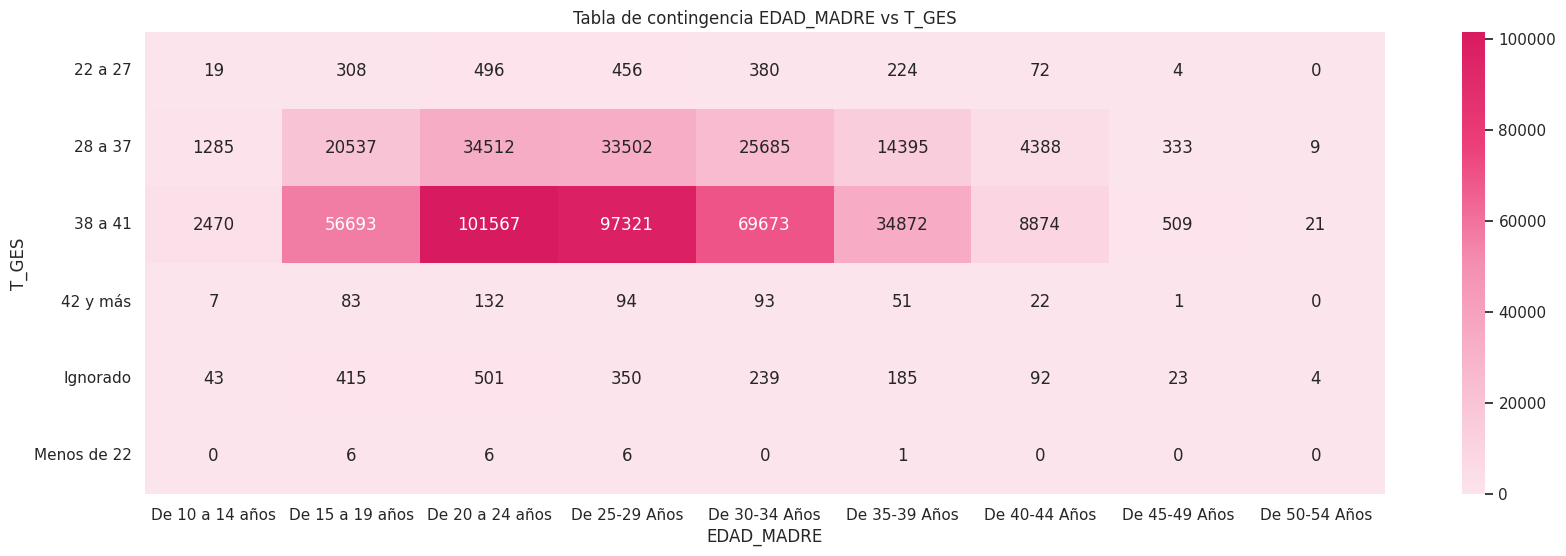

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Paleta rosa
rosa_pastel = LinearSegmentedColormap.from_list(
    "rosa_pastel",
    ["#FCE4EC", "#F8BBD0", "#F48FB1", "#EC407A", "#D81B60"]
)



sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(tabla_contingencia, annot=True, cmap=rosa_pastel, fmt="d")
plt.title("Tabla de contingencia EDAD_MADRE vs T_GES")
plt.xlabel("EDAD_MADRE")
plt.ylabel("T_GES")
plt.show()

In [ ]:
res = stats.chi2_contingency(tabla_contingencia)
print(res)

Chi2ContingencyResult(statistic=np.float64(1346.2476465612401), pvalue=np.float64(2.124043116901588e-256), dof=40, expected_freq=array([[1.46610902e+01, 2.99210461e+02, 5.26073963e+02, 5.05044653e+02,
        3.68329220e+02, 1.90655516e+02, 5.15591897e+01, 3.33555138e+00,
        1.30354882e-01],
       [1.00768614e+03, 2.05653352e+04, 3.61581188e+04, 3.47127322e+04,
        2.53160062e+04, 1.31041361e+04, 3.54376654e+03, 2.29259138e+02,
        8.95955253e+00],
       [2.78403551e+03, 5.68179130e+04, 9.98976591e+04, 9.59043446e+04,
        6.99430678e+04, 3.62041103e+04, 9.79071902e+03, 6.33397200e+02,
        2.47534538e+01],
       [3.61475578e+00, 7.37716451e+01, 1.29705832e+02, 1.24520964e+02,
        9.08131768e+01, 4.70069497e+01, 1.27121432e+01, 8.22394752e-01,
        3.21395650e-02],
       [1.38603058e+01, 2.82867674e+02, 4.97339959e+02, 4.77459264e+02,
        3.48211187e+02, 1.80241969e+02, 4.87430420e+01, 3.15336456e+00,
        1.23234937e-01],
       [1.42195362e-01, 2.

In [ ]:
#Prueba de hipótesis de asociación.
# Ho: X y Y no están asociadas.
# Ha: X y Y están asociadas.

res = stats.chi2_contingency(tabla_contingencia)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es: {chi}")
print(f"El valor p es: {valor_p}")

El valor de la estadística Chi cuadrado es: 1346.2476465612401
El valor p es: 2.124043116901588e-256




*   Si el valor p < 0.05 se rechaza la hipótesis nula.
*   Si el valor p > 0.05 no se rechaza la hipótesis nula.

Como el valor p $= 2.124043116901588\times10^{256} < 0.05$


Con una confianza del 95% se rechaza la hipótesis nula, es decir que, las variables están asociadas, por ende la edad de la madre y el tiempo de gestación presentan asociación.

In [ ]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(chi + len(df2.T_GES)*min(6-1, 9-1)))
print(f"El coeficiente de contingencia es: {coeficiente_contingencia}")
print(f"El coeficiente phi es: {coeficiente_phi}")
print(f"El coeficiente VCramer es: {coeficiente_v_cramer}")

El coeficiente de contingencia es: 0.05126229863284951
El coeficiente phi es: 0.051329785800659763
El coeficiente VCramer es: 0.02294933229226964


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [The Measurement of Observer Agreement for Categorical Data](https://2024.sci-hub.st/2153/7a79ed8d1ae20779cbcdf5ab36348bc2/landis1977.pdf) se tiene que la edad de la madre y el tiempo de gestación de un recién nacido en Colombia están insignificantemente asociadas.

Interpretación general:


*   Y depende ______ de X.
*   X y Y son ______ homogéneas.
*   X y Y están _____ asociadas.

Donde _____ = nula ($Chi, \phi, V = 0$), _______ = insignificante ($ 0< Chi, \phi, V < 0.2$), _______ = discretamente ($ 0.2 < Chi, \phi, V < 0.4$), _______ = Moderadamente($ 0.4 < Chi, \phi, V < 0.6$), _______ = Sustancialmente ($ 0.6 < Chi, \phi, V < 0.8$) y ________ = Fuertemente ($ 0.8 < Chi, \phi, V < 1$)

### **Comportamiento de T_GES (tiempo de gestación)**  
La distribución del tiempo de gestación muestra que la mayoría de los nacidos vivos en Colombia (72.8%) se encuentran entre **38 y 41 semanas**, lo que corresponde a gestaciones a término. El segundo grupo más frecuente es el de **28 a 37 semanas** (26.4%). Los periodos extremos —menos de 22 semanas, 22 a 27 semanas y 42 semanas o más— representan en conjunto **menos del 1%**, lo que evidencia una tendencia hacia gestaciones dentro del rango esperado como normal,según se observa tanto en la tabla de frecuencias obtenida a partir de los datos como en el gráfico circular que resume dichas proporciones.

### **Asociación entre T_GES y EDAD_MADRE**  
Para evaluar la relación entre el tiempo de gestación (T_GES) y la edad de la madre (EDAD_MADRE), se aplicó una prueba de chi-cuadrado:

- **Valor $p \approx 0\ (<0.05)$**, lo que indica **asociación estadísticamente significativa** entre ambas variables.

Coeficientes de asociación:

- **Coeficiente de contingencia:** $C \approx 0.05$  
- **Coeficiente $\phi$ (phi):** $\phi \approx 0.05$  
- **V de Cramer:** $V \approx 0.02$  

Según Landis & Koch (1977), valores menores a $0.20$ indican una asociación **muy débil**. Esto significa que, aunque existe dependencia estadística, la **fuerza de la relación es mínima**.


### **Conclusión**  
Aunque existe asociación entre el tiempo de gestación y la edad materna, la magnitud de esta relación es **insignificante**. En términos prácticos, la edad de la madre **no explica de manera relevante** el comportamiento del tiempo de gestación en los nacidos vivos analizados.
